### For BHR71 JWST Cycle 1 proposal  
Find the number density distribution as a function of K-band magnitude for stars at a nearby field to BHR71

Use CTIO Ks-band image as the starting point

In [2]:
from astropy.io import fits
hdu = fits.open('/Volumes/SD-Mac/Google Drive/research/bhr71/data/photometry/BHR71-NIR/CTIO-ISPI/BHR71ks-mosaiclc.fits')
magzp = hdu[0].header['MAGZP']
print('magzp = ', magzp)

from astropy import wcs
wcs = wcs.WCS(hdu[0].header)

magzp =  21.9305


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Preview the image

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -5.647e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.896e+03 [aplpy.core]


/Users/yaolun/anaconda/envs/py36/lib/python3.6/site-packages/aplpy-0.0.dev1030-py3.6.egg/aplpy/colorbar.py:397: UserWarning: This method is not functional at this time
  warnings.warn("This method is not functional at this time")
/Users/yaolun/anaconda/envs/py36/lib/python3.6/site-packages/aplpy-0.0.dev1030-py3.6.egg/aplpy/overlays.py:259: UserWarning: Text labels do not have attribute linestyle. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/yaolun/anaconda/envs/py36/lib/python3.6/site-packages/aplpy-0.0.dev1030-py3.6.egg/aplpy/overlays.py:259: UserWarning: Text labels do not have attribute linewidth. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/yaolun/anaconda/envs/py36/lib/python3.6/site-packages/aplpy-0.0.dev1030-py3.6.egg/aplpy/overlays.py:259: UserWarning: Text labels do not have attribute corner. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".fo

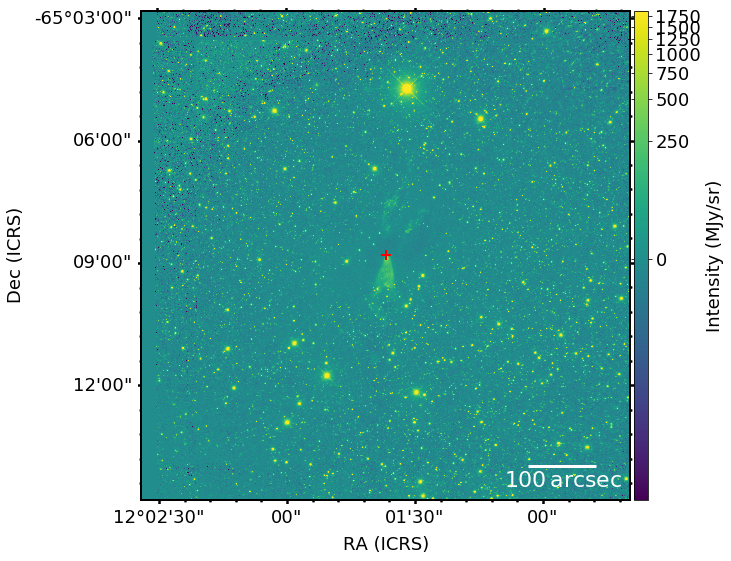

In [3]:
%matplotlib inline
from make_image import make_image
from astropy.coordinates import SkyCoord
from astropy import units as u
center = SkyCoord('12 01 36.81 -65 08 49.22', unit=(u.hourangle, u.deg))
im = make_image('/Volumes/SD-Mac/Google Drive/research/bhr71/data/photometry/BHR71-NIR/CTIO-ISPI/BHR71ks-mosaiclc.fits',
                coord='12 01 36.81 -65 08 49.22', size=0.1, bar_size=100, stretch='log', framecolor='black', plotname='BHR71_CTIO_Ks')

In [4]:
size_msa = (95*87)**0.5
size_nircam = 129

pix_msa = int(size_msa/3600/abs(hdu[0].header['CD1_1']))
pix_nircam = int(size_nircam/3600/abs(hdu[0].header['CD1_1']))
print(pix_msa, pix_nircam)

# pixel coordinates for BHR71
center = SkyCoord('12 01 36.81 -65 08 49.22', unit=(u.hourangle, u.deg))
pix_center = wcs.wcs_world2pix([[center.ra.degree, center.dec.degree]],1).flatten()
print(pix_center)

296 420
[ 1185.89048498  1274.65669479]


[None, None, None, None]

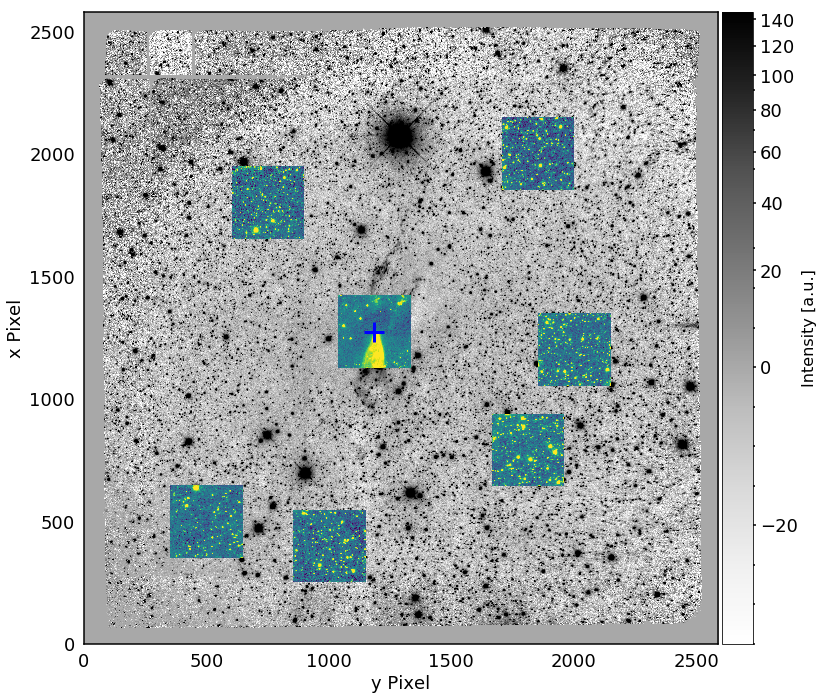

In [37]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from astropy.visualization import (PercentileInterval, AsinhStretch,
                                   ImageNormalize)
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

# Create an ImageNormalize object
norm = ImageNormalize(hdu[0].data, interval=PercentileInterval(95), stretch=AsinhStretch())
plot_im = ax.imshow(hdu[0].data, norm=norm, origin='lower', aspect=1, cmap='Greys')

ax.plot([pix_center[0]], [pix_center[1]], '+', markersize=20, color='b', mew=3)

def plot_subsetImage(mask_center, im, ax, size=900):

    if size == 'NIRCAM':
        size = 420
    elif size == 'MSA':
        size = 296

    mask = np.ones_like(im)
    mask[mask_center[0]-size//2:mask_center[0]+size//2, mask_center[1]-size//2:mask_center[1]+size//2] = 0
    # mask[100:1000, 1600:2500] = 0
    # NIRCAM size
    # mask[580:1000, 1600:2020] = 0
    # MSA size
#     mask[580:876, 1724:2020] = 0
    im_masked = np.ma.array(im, mask=mask)
    ax.imshow(im_masked, norm=norm, origin='lower', aspect=1, cmap='viridis')

    im_trimmed = im.copy()[mask_center[0]-size//2:mask_center[0]+size//2, mask_center[1]-size//2:mask_center[1]+size//2]
    
    return im_trimmed

subset_list = [[790, 1810], [400, 1000], [1800, 750], [1200, 2000], [500, 500], [2000, 1850], [int(pix_center[1]), int(pix_center[0])]]
subset_im = []
for subset in subset_list:
    im_trimmed = plot_subsetImage(subset, hdu[0].data, ax, size='MSA')
    subset_im.append(im_trimmed)

# im_trimmed = hdu[0].data.copy()[100:1000, 1600:2500]
# NIRCAM size
# im_trimmed = hdu[0].data.copy()[580:1000, 1600:2020]
# MSA size
# im_trimmed = hdu[0].data.copy()[580:876, 1724:2020]

# add colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = fig.colorbar(plot_im, cax=cax)
cb.solids.set_edgecolor("face")
cb.ax.minorticks_on()
cb.ax.set_ylabel('Intensity [a.u.]',fontsize=16)
cb.ax.tick_params('both', width=1.5, which='major', length=3)
cb.ax.tick_params('both', width=1.5, which='minor', length=2)
cb_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cb_obj,fontsize=18)

ax.set_xlabel('y Pixel', fontsize=18)
ax.set_ylabel('x Pixel', fontsize=18)
ax.tick_params(axis='both', which='major', width=1.5, labelsize=18, color='white', length=5)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]


Find sources in the image subset

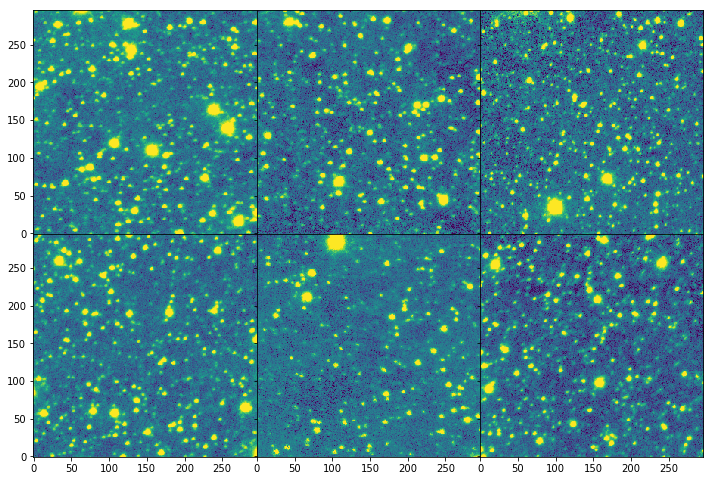

In [38]:
from mpl_toolkits.axes_grid1 import make_axes_locatable, ImageGrid
fig = plt.figure(figsize=(12,12))
grid = ImageGrid(fig, 111,nrows_ncols=(2,3),direction='row',
                 add_all=True,label_mode='L',share_all=True, axes_pad=0)
for i, im in enumerate(subset_im[:-1]):
    grid[i].imshow(im, norm=norm, origin='lower')

Use DAOFIND method

(-1.039360707530949, -2.8044509887695312, 11.136822624729097)
(-6.6504881372034301, -7.0548610687255859, 9.9598587007407886)
(-5.3942650517696249, -6.2081265449523926, 11.479408818293594)
(-3.9676948248600539, -5.0744033, 9.1296794315597865)
(-4.6700921865595557, -4.5200891, 8.0657296516358201)
(-8.5844390217909172, -9.6114845275878906, 10.303989720734318)


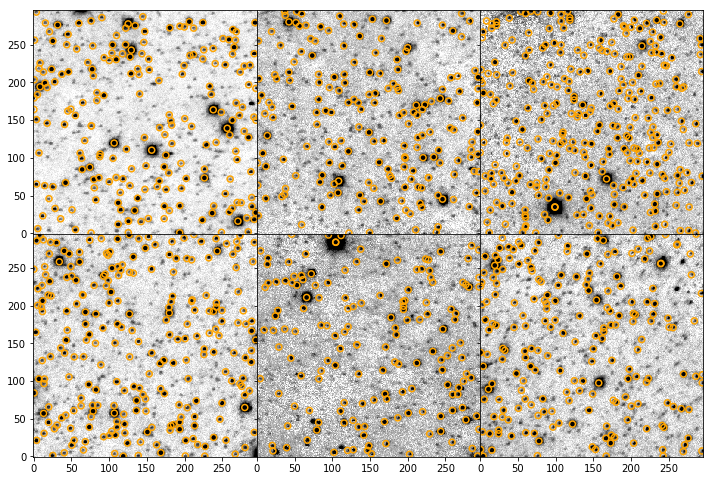

In [46]:
from astropy.stats import sigma_clipped_stats
from photutils import DAOStarFinder
from photutils import aperture_photometry
from photutils import CircularAperture

from mpl_toolkits.axes_grid1 import make_axes_locatable, ImageGrid
fig = plt.figure(figsize=(12,12))
grid = ImageGrid(fig, 111,nrows_ncols=(2,3),direction='row',
                 add_all=True,label_mode='L',share_all=True, axes_pad=0)

phot_table_list = []

for i, im in enumerate(subset_im[:-1]):
    
    mean, median, std = sigma_clipped_stats(im, sigma=3.0, iters=5)
    print((mean, median, std))

    daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)
    sources = daofind((im-median))

    positions = (sources['xcentroid'], sources['ycentroid'])    
    apertures = CircularAperture(positions, r=4.)
    phot_table = aperture_photometry(im, apertures)
    phot_table_list.append(phot_table)
    
    # plot the found sources
    norm = ImageNormalize(im, interval=PercentileInterval(95), stretch=AsinhStretch())
    grid[i].imshow(im, origin='lower', cmap='Greys', norm=norm)
    apertures.plot(color='orange', lw=1.5, alpha=1, ax=grid[i])


Plot the distribution of star counts

[ 0.30667709 -3.48229156]


/Users/yaolun/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


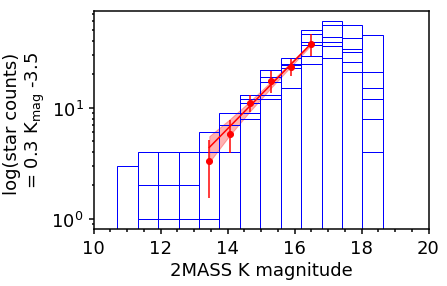

In [40]:
from astropy.visualization import hist

fig = plt.figure()
ax = fig.add_subplot(111)

x_list = []
y_list = []
for i, p in enumerate(phot_table_list):
    p['flux_corrected'] = -2.5*np.log10(p['aperture_sum'] / 20) + magzp
    
    if i == 0:
        bins = 'knuth'
    else:
        bins = h[1]
    h = hist(p['flux_corrected'][p['aperture_sum'] > 0], bins=bins, ax=ax, log=True, edgecolor=(0,0,1,1), facecolor='None')

    x = (h[1][1:]+h[1][:-1])/2
    y = h[0]
    selector = (x >= 13) & (x <= 17)
    x_list.append(x[selector])
    y_list.append(y[selector])

x_array = np.array(x_list[0])
y_array = np.array(y_list)
logy_sigma = np.log10(np.mean(y_array, axis=0)) - np.log10(np.mean(y_array, axis=0)-np.std(y_array, axis=0))

p, cov = np.polyfit(x_array, np.log10(np.mean(y_array, axis=0)), 1, w=1/logy_sigma, cov=True)
y_fit = 10**(p[0]*x_array+p[1])
y_err = 10**((cov[0,0]*x_array**2+2*cov[0,1]*x_array+cov[1,1])**0.5)
print(p)

ax.errorbar(x_array, np.mean(y_array, axis=0), yerr=np.std(y_array, axis=0), color='r', marker='o', linestyle='None')
ax.plot(x_array, y_fit, 'r-')
ax.fill_between(x_array, y_fit+y_err, y_fit-y_err, color='r', alpha=0.3)

ax.set_xlabel('2MASS K magnitude', fontsize=18)
ax.set_ylabel('log(star counts) \n'+r'= %.1f K$_{\rm mag}$ %.1f' %(p[0], p[1]), fontsize=18, multialignment='center')
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=5,length=2.5)
ax.set_xticks([10,12,14,16,18,20])

# fig.savefig('/Users/yaolun/GoogleDrive/proposal/JWST/BHR71_NIR/ctio_kmag_fit.pdf', format='pdf', dpi=300, bbox_inches='tight')

### Toward the center of BHR71

(-1.5452803224685616, -2.1661475, 8.5034353792133306)


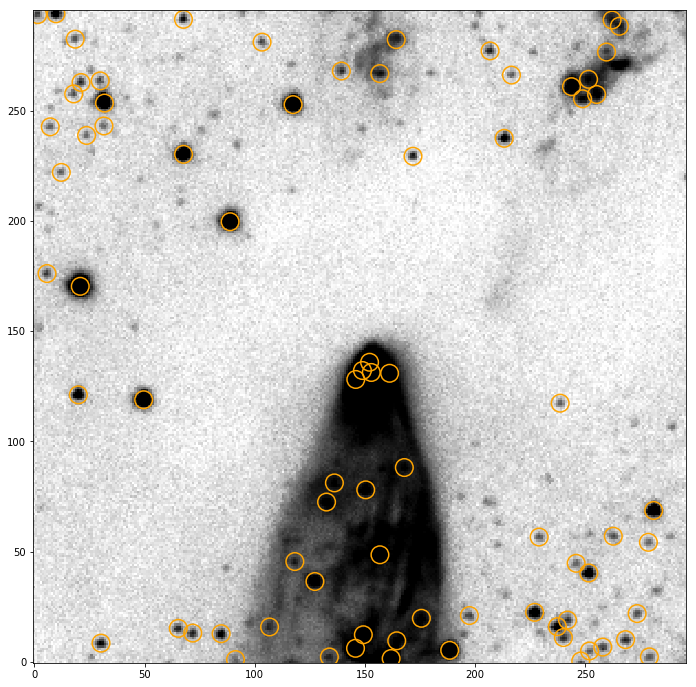

In [45]:
from astropy.stats import sigma_clipped_stats
from photutils import DAOStarFinder
from photutils import aperture_photometry
from photutils import CircularAperture

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

im = subset_im[-1]
    
mean, median, std = sigma_clipped_stats(im, sigma=3.0, iters=5)
print((mean, median, std))

daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)
sources = daofind((im-median))

positions = (sources['xcentroid'], sources['ycentroid'])    
apertures = CircularAperture(positions, r=4.)
phot_table_center = aperture_photometry(im, apertures)

# plot the found sources
norm = ImageNormalize(im, interval=PercentileInterval(95), stretch=AsinhStretch())
ax.imshow(im, origin='lower', cmap='Greys', norm=norm)
apertures.plot(color='orange', lw=1.5, alpha=1, ax=ax)


[ 0.14474959 -1.19010476]


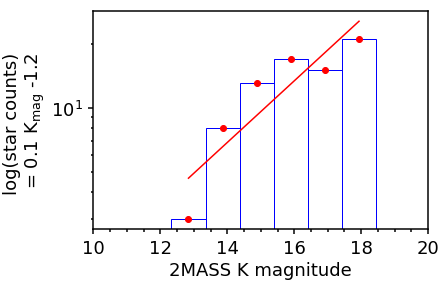

In [50]:
from astropy.visualization import hist

fig = plt.figure()
ax = fig.add_subplot(111)

phot_table_center['flux_corrected'] = -2.5*np.log10(phot_table_center['aperture_sum'] / 20) + magzp

h = hist(phot_table_center['flux_corrected'][phot_table_center['aperture_sum'] > 0], bins='knuth', ax=ax, log=True, edgecolor=(0,0,1,1), facecolor='None')

x = (h[1][1:]+h[1][:-1])/2
y = h[0]
selector = (x >= 13) & (x <= 17)

p = np.polyfit(x, np.log10(y), 1)
y_fit = 10**(p[0]*x+p[1])
print(p)

ax.plot(x, y, color='r', marker='o', linestyle='None')
ax.plot(x, y_fit, 'r-')

ax.set_xlabel('2MASS K magnitude', fontsize=18)
ax.set_ylabel('log(star counts) \n'+r'= %.1f K$_{\rm mag}$ %.1f' %(p[0], p[1]), fontsize=18, multialignment='center')
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=5,length=2.5)
ax.set_xticks([10,12,14,16,18,20])

# fig.savefig('/Users/yaolun/GoogleDrive/proposal/JWST/BHR71_NIR/ctio_kmag_fit.pdf', format='pdf', dpi=300, bbox_inches='tight')